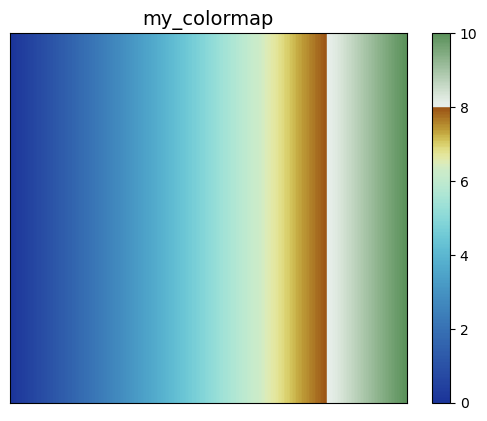

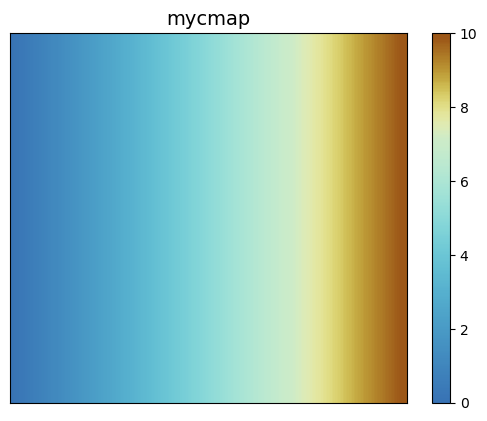

In [ ]:
import cmocean
import cmocean.plots 
import numpy as np
import matplotlib.colors as mcolors
import cmcrameri.cm as cmc
import matplotlib as mpl
import cmweather

def make_cmap(cmin, cmax):
    cmap = mpl.colormaps['CM_rhohv_r']
    cmap = cmocean.tools.crop_by_percent(cmap, 5, 'max')
    cmap2 = cmc.cork
    cmap2 = cmocean.tools.crop_by_percent(cmap2, 50, 'min')
    cmap2 = cmocean.tools.crop_by_percent(cmap2, 50, 'max')
    cmap_rgba = cmap(np.linspace(0, 1, abs(cmin)))
    cmap_rgba[:, 3] = 1  # set alpha to 1
    cmap2_rgba = cmap2(np.linspace(0, 1, cmax))
    cmap2_rgba[:, 3] = 1  # set alpha to 1
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', np.vstack((cmap_rgba, cmap2_rgba)))
    return mymap



cmin, cmax = -8000, 2000
cmap = make_cmap(cmin, cmax)

cmap2 = cmocean.tools.crop_by_percent(cmap, 20, 'max')
cmap2 = cmocean.tools.crop_by_percent(cmap2, 25, 'min')

cmocean.plots.quick_plot(cmap, fig=None, ax=None, N=256)
cmocean.plots.quick_plot(cmap2, fig=None, ax=None, N=256)


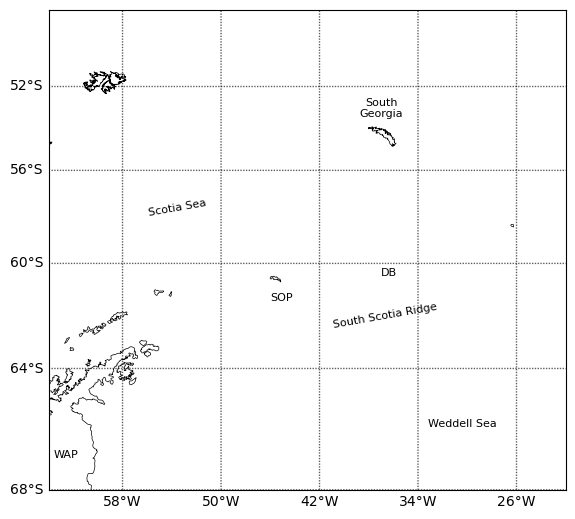

In [102]:
from setup import import_split_and_make_transects, Profile, Transect
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import xarray as xr
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from scipy.stats import linregress
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import FancyBboxPatch
from matplotlib.pyplot import Axes
import cmocean
import cmweather
import cmcrameri.cm as cmc
fig = plt.figure(figsize=(12, 6))  # Landscape orientation
ax:Axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # Adjust the position as needed
m2 = Basemap(projection='merc', llcrnrlat=-68, urcrnrlat=-48, llcrnrlon=-64, urcrnrlon=-22,
             resolution='i', ax=ax)
m2.drawcoastlines(linewidth=0.5)
m2.drawparallels(np.arange(-68,-48, 4), labels=[1,0,0,0], color='#000000A0')
m2.drawmeridians(np.arange(-66, -18, 8), labels=[0,0,0,1], color='#000000A0')

ax.text(*m2(-63.6, -67), "WAP", size=8)
ax.text(*m2(-37, -60.5), "DB", size=8)
ax.text(*m2(-46, -61.5), "SOP", size=8)
ax.text(*m2(-37, -53.5), "South\nGeorgia", horizontalalignment='center', size=8)
ax.text(*m2(-33.2, -66), "Weddell Sea", rotation=0, size=8)
ax.text(*m2(-41, -62.5), "South Scotia Ridge", rotation=10, size=8)
ax.text(*m2(-56, -58), "Scotia Sea", rotation=10, size=8)


plt.show()